
<h2>Exploration (get a very first feeling of the data)</h2>



In [29]:
import pandas as pd

In [34]:
column_name='zwst (mg/l)'

In [117]:
path='Data/'
orig_influent=pd.read_excel(path+"Kennisnetwerk_procesdata_kwaliteitsdata_WLN.xlsx", sheet_name='Influent lab analyses')
orig_influent=orig_influent[['Datum', column_name]]

orig_effluent=pd.read_excel(path+"Kennisnetwerk_procesdata_kwaliteitsdata_WLN.xlsx", sheet_name='effl. lab analyses')
orig_effluent=orig_effluent[['Datum', column_name]]
#effluent.head()



In [174]:
effluent=orig_effluent.copy()
influent=orig_influent.copy()
#opruimen maffe velden
strange_items=effluent[column_name].str.contains('<',na=False)
effluent=effluent[strange_items==False]

influent=orig_influent.copy()
#effluent

effluent['date'] = pd.to_datetime(effluent['Datum'], format='%d-%m-%Y').dt.date
influent['date'] = pd.to_datetime(influent['Datum'], format='%d-%m-%Y').dt.date
effluent.set_index('date')
influent.set_index('date')

,Datum,zwst (mg/l)
date,,
2014-10-01,2014-10-01,172.0
2014-10-06,2014-10-06,91.0
2014-10-11,2014-10-11,66.0
2014-10-16,2014-10-16,174.0
2014-10-21,2014-10-21,74.0
2014-10-26,2014-10-26,113.0
2014-10-31,2014-10-31,207.0
2014-11-05,2014-11-05,68.0
2014-11-10,2014-11-10,54.0


In [176]:
result=pd.merge(influent,effluent,on=['Datum'], how='outer',suffixes=("_inf","_eff"))
result
result.set_index("date_inf")
#selection=result[pd.isnull(result).any(axis=1)]

#selection.head()

,Datum,zwst (mg/l)_inf,zwst (mg/l)_eff,date_eff
date_inf,,,,
2014-10-01,2014-10-01,172.0,17,2014-10-01
2014-10-06,2014-10-06,91.0,7,2014-10-06
2014-10-11,2014-10-11,66.0,39,2014-10-11
2014-10-16,2014-10-16,174.0,15,2014-10-16
2014-10-21,2014-10-21,74.0,11,2014-10-21
2014-10-26,2014-10-26,113.0,15,2014-10-26
2014-10-31,2014-10-31,207.0,13,2014-10-31
2014-11-05,2014-11-05,68.0,18,2014-11-05
2014-11-10,2014-11-10,54.0,10,2014-11-10


In [171]:
print("influent:",influent.shape)
print("effluent:",effluent.shape)
print("result:",result.shape)
result



influent: (170, 2)
effluent: (255, 2)
result: (261, 3)


,Datum,zwst (mg/l)_inf,zwst (mg/l)_eff
0,2014-10-01,172.0,17
1,2014-10-06,91.0,7
2,2014-10-11,66.0,39
3,2014-10-16,174.0,15
4,2014-10-21,74.0,11
5,2014-10-26,113.0,15
6,2014-10-31,207.0,13
7,2014-11-05,68.0,18
8,2014-11-10,54.0,10
9,2014-11-15,161.0,19


Text(0.5,1,'zwst (mg/l)')

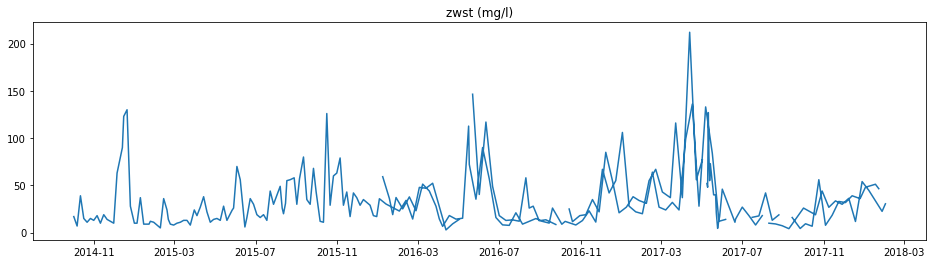

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(16, 4)) 
plt.plot(result.Datum,result[column_name+"_inf"])
plt.plot(result.Datum,result[column_name+"_eff"])
plt.title(column_name)

<h2>3. Select some data</p></h2>
Now, let us make a selection of the data and show this.


### a. Pick a garage_id, and a time_window as described below.
from_datetime="2016-01-01 00:00:00"

to_datetime="2016-03-01 00:00:00"

garage_id=36


### b. Filter the dataframe using these dates and garage_id. 
### c. See if the filtering worked and check how many lines remain in the filtered dataframe. 

In [26]:
from_datetime="2016-01-01 00:00:00"
to_datetime="2016-03-01 00:00:00"
garage_id=36
# create a date_time column, and filter using a 'mask' 
visitors_per_day['visit_datetime'] = pd.to_datetime(visitors_per_day['visit_date'])
mask = (visitors_per_day['visit_datetime']>=from_datetime) & (visitors_per_day['visit_datetime'] <= to_datetime) & (visitors_per_day['garage_id']==garage_id)
# not necessary, but one is allowed to remove that superfluous column here
#visitors_per_day=visitors_per_day.drop(['visit_datetime'], axis=1)
selected= visitors_per_day.loc[mask]
print("from", from_datetime,"to",to_datetime,"aantal:",len(selected))
selected.head(5)


from 2016-01-01 00:00:00 to 2016-03-01 00:00:00 aantal: 61


,garage_id,visit_date,count_transactions,visit_datetime
0,36,2016-01-01,328,2016-01-01
1,36,2016-01-02,2740,2016-01-02
2,36,2016-01-03,1201,2016-01-03
3,36,2016-01-04,1263,2016-01-04
4,36,2016-01-05,456,2016-01-05


<h2>4. Calculate a rolling mean of visitors</h2>
Use the **filtered dataset** from the previous question. 

### a. Make sure you understand the concept of a rolling mean. 
A *rolling mean* is also called called *moving average*. See https://en.wikipedia.org/wiki/Moving_average for an explanation.

### b. Compute the rolling mean on the count of transactions per day per garage. 
See https://stackoverflow.com/questions/15771472/pandas-rolling-mean-by-time-interval on how to implement a rolling mean in pandas. Choose a proper window size. 

### c. Show the number of visits in a graph.
Plot the total amount of visitors on a given day in a plot. Add the rolling mean to the same plot. Use matplotlib's *plot* function. 

In [27]:
with_rolling_mean=selected.copy()
with_rolling_mean['RollingMean']=with_rolling_mean['count_transactions'].rolling(window=7).mean()
with_rolling_mean.head()

,garage_id,visit_date,count_transactions,visit_datetime,RollingMean
0,36,2016-01-01,328,2016-01-01,NaN
1,36,2016-01-02,2740,2016-01-02,NaN
2,36,2016-01-03,1201,2016-01-03,NaN
3,36,2016-01-04,1263,2016-01-04,NaN
4,36,2016-01-05,456,2016-01-05,NaN


Text(0.5,1,'# visits per day')

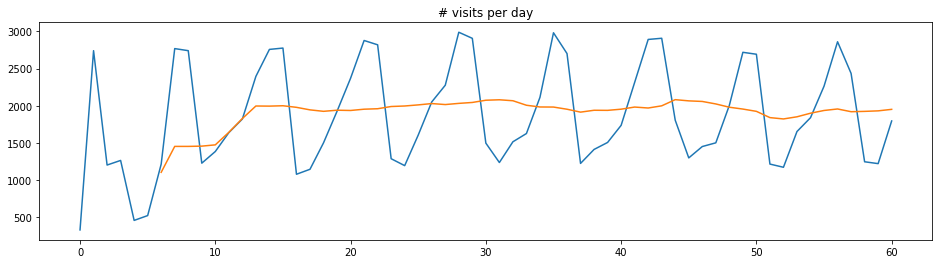

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(16, 4)) 
plt.plot(with_rolling_mean['count_transactions'])
plt.plot(with_rolling_mean['RollingMean'])
plt.title("# visits per day")

<h2>5. Draw some graphs</h2>

### a. Add date features
Add the year, week, month, day, day of year and day of the week as features. Use the corresponding functions from *datetime*.
### b. Make graphs per month for all garages
For each month, make a separate plot with separate lines for each garage to show the trend of the number of visitors. Color some dots systematically so you can detect a pattern (for example, give each monday a different color than the other dots).

Do you see a pattern?

### c. Make a graph per weekday per garage. 
Count the total transactions per weekday.  Make a plot with the days of the week on the x-axis, the number of transactions on the y-axis, and a separate line for each garage to show the week pattern. 

### d. Make a graph per hour per garage.
Same as in c., but now use hour instead of weekday. So, the x-axis will consists of all 24 hours in a day. 



In [29]:
visitors_per_day['visit_datetime'] = pd.to_datetime(visitors_per_day['visit_date'])
visitors_per_day['year']=visitors_per_day.visit_datetime.dt.year
visitors_per_day['week']=visitors_per_day.visit_datetime.dt.week
visitors_per_day['month']=visitors_per_day.visit_datetime.dt.month
visitors_per_day['day']=visitors_per_day.visit_datetime.dt.day
visitors_per_day['dayofyear']=visitors_per_day.visit_datetime.dt.dayofyear
visitors_per_day['weekday']=visitors_per_day.visit_datetime.dt.weekday
visitors_per_day.head(5)

,garage_id,visit_date,count_transactions,visit_datetime,year,week,month,day,dayofyear,weekday
0,36,2016-01-01,328,2016-01-01,2016,53,1,1,1,4
1,36,2016-01-02,2740,2016-01-02,2016,53,1,2,2,5
2,36,2016-01-03,1201,2016-01-03,2016,53,1,3,3,6
3,36,2016-01-04,1263,2016-01-04,2016,1,1,4,4,0
4,36,2016-01-05,456,2016-01-05,2016,1,1,5,5,1


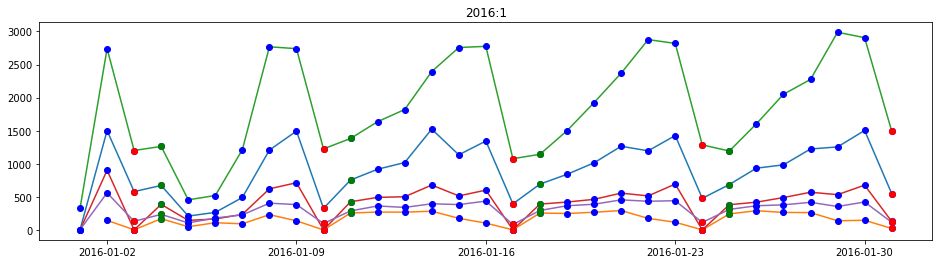

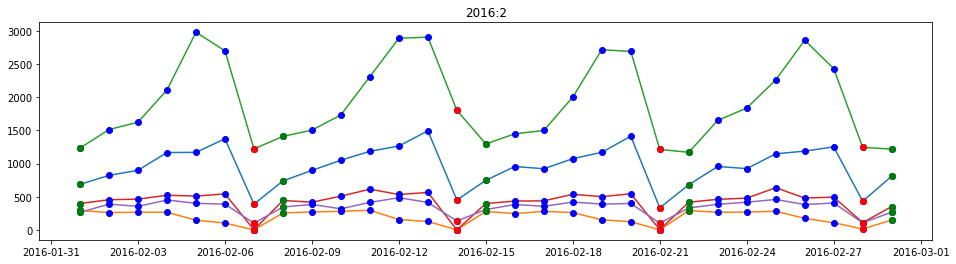

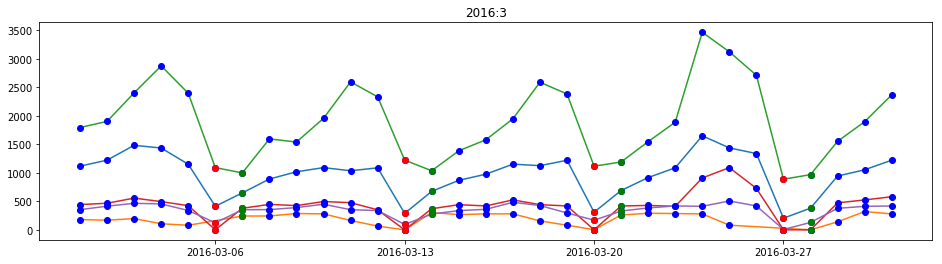

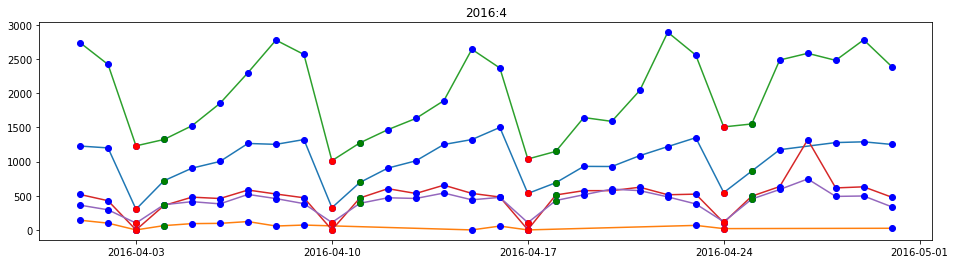

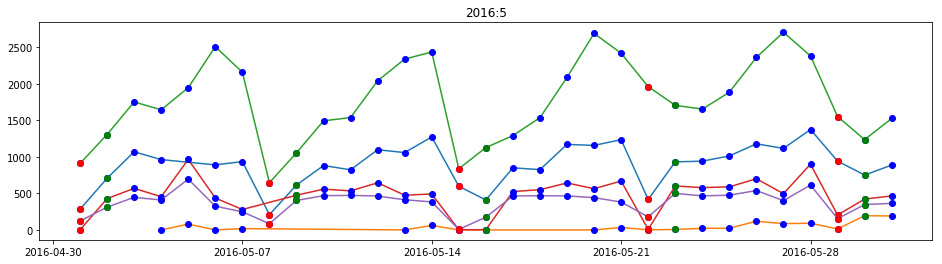

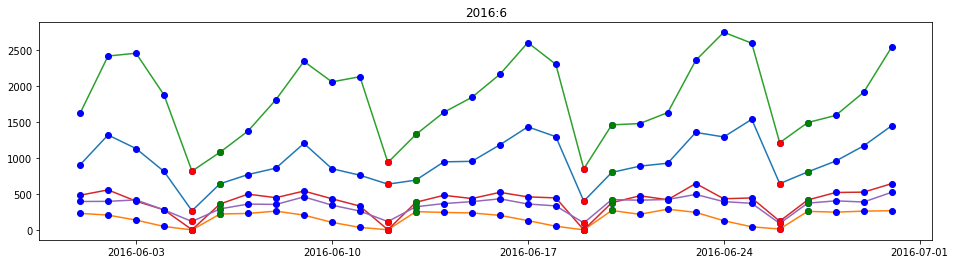

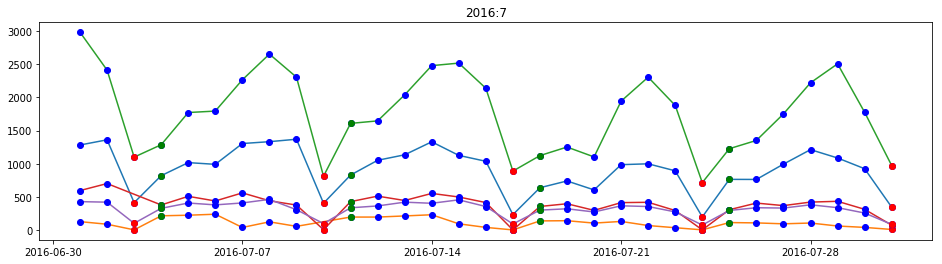

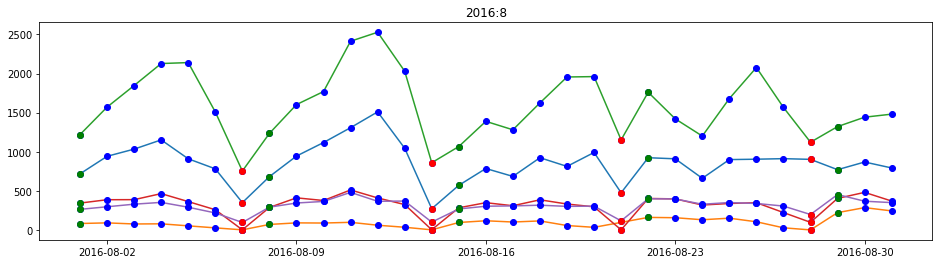

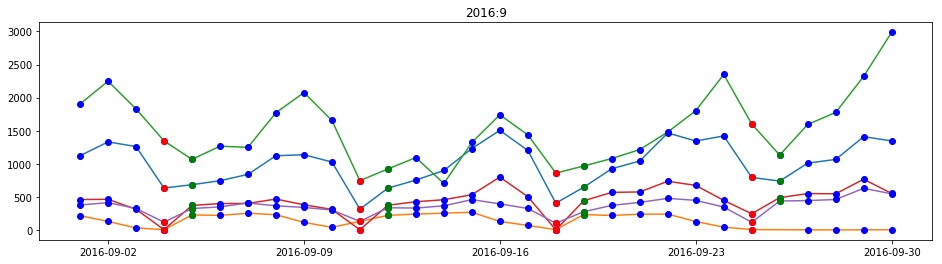

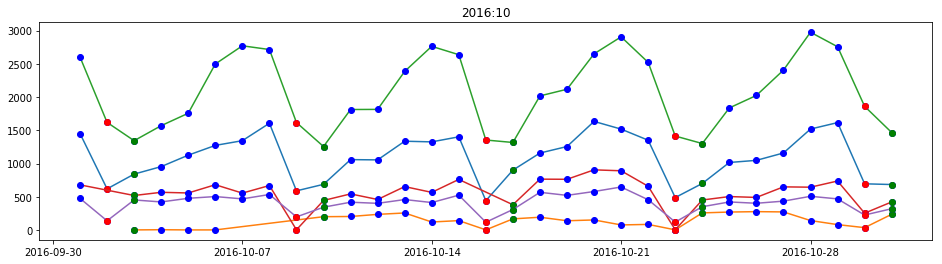

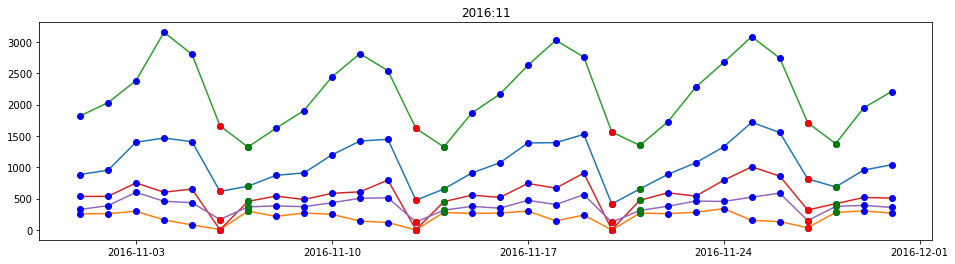

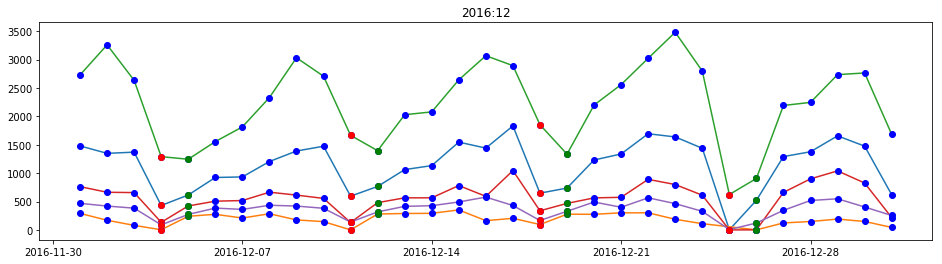

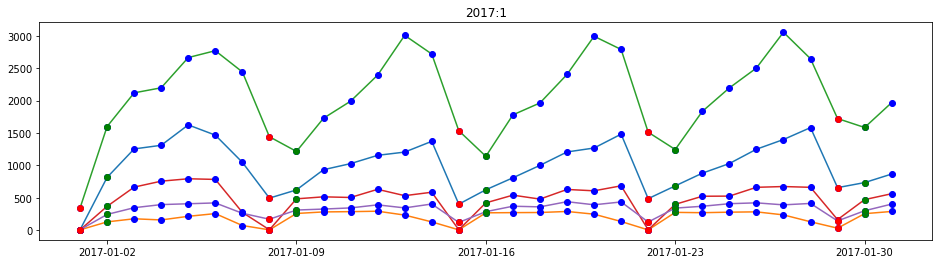

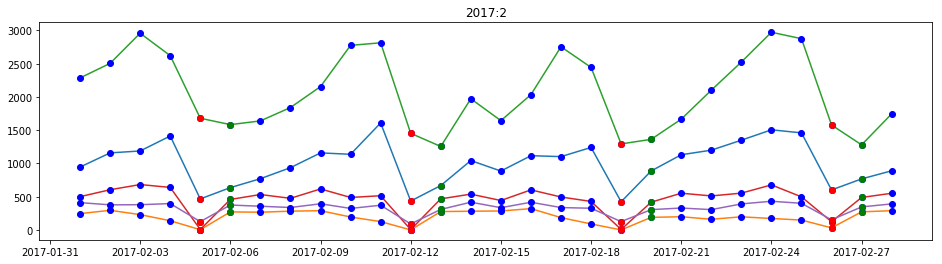

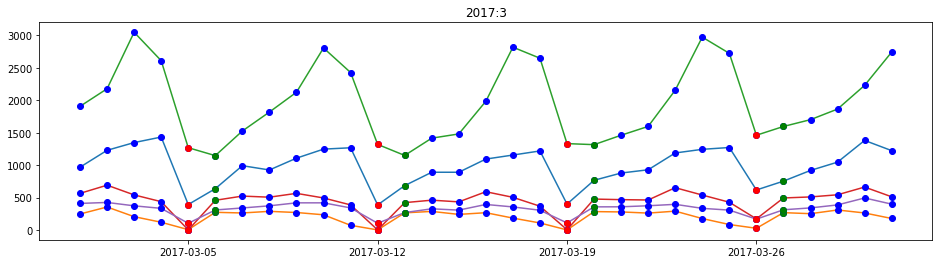

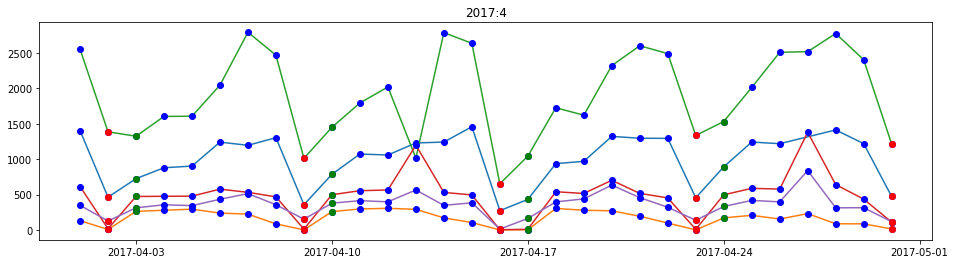

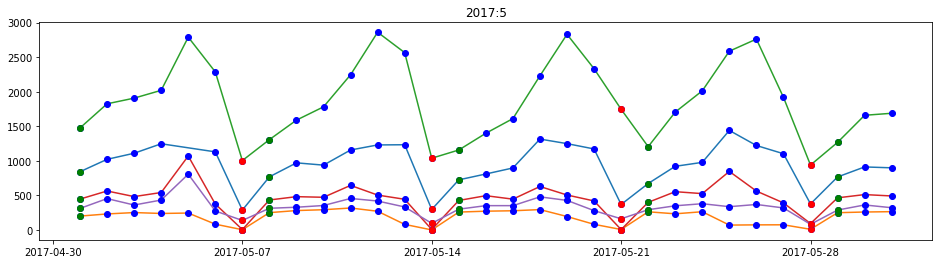

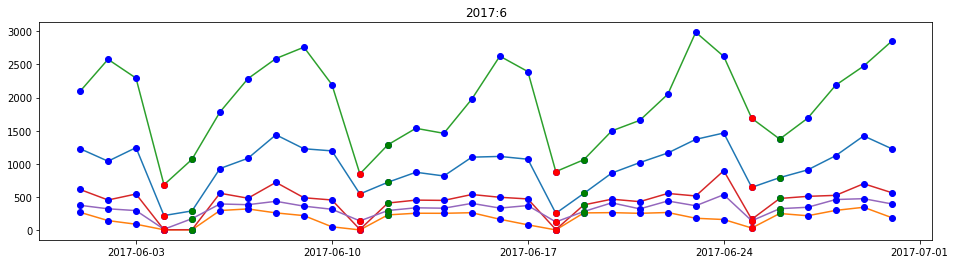

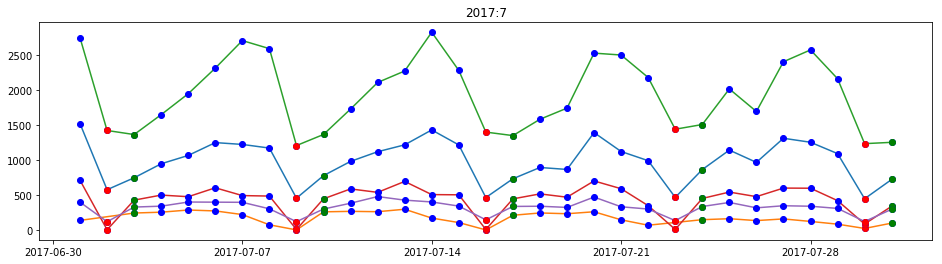

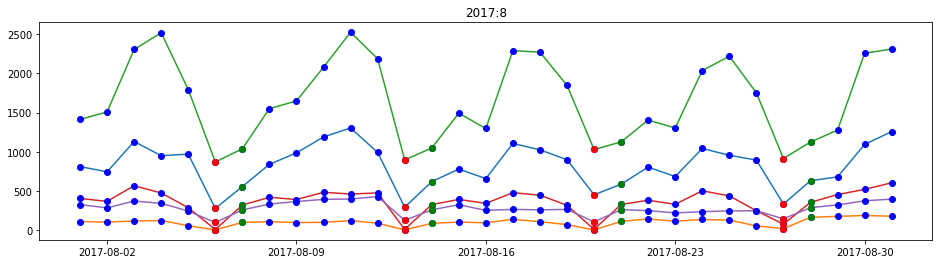

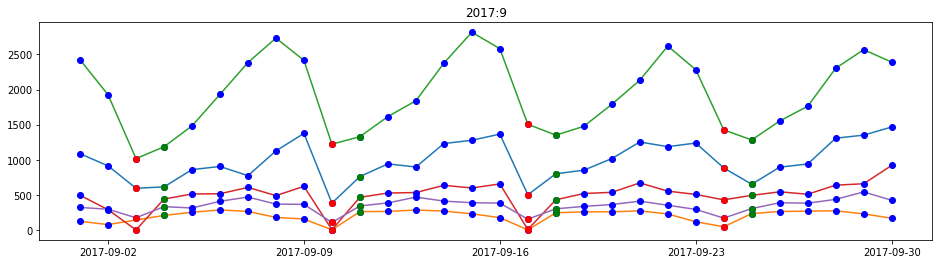

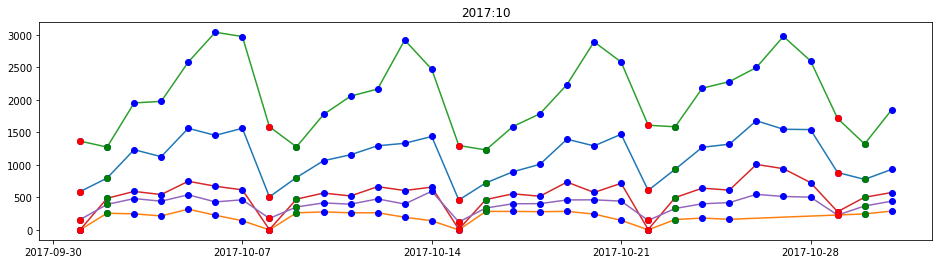

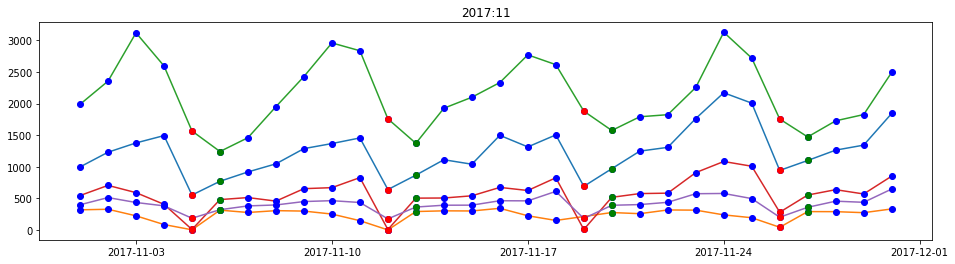

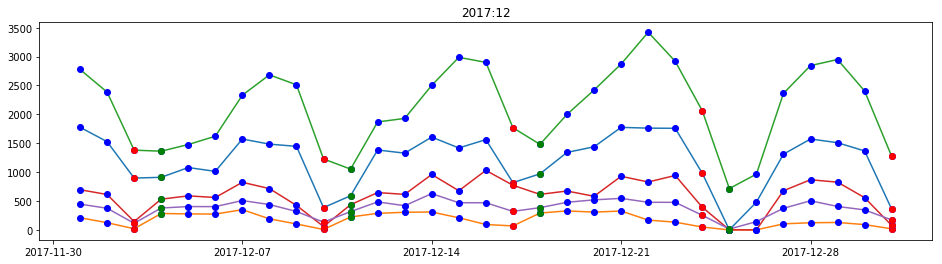

In [34]:
import matplotlib.pyplot as plt
for year in range(2016,2017+1):
    for month in range(1,12+1):
        fig = plt.figure(figsize=(16, 4))   
        for garage_id in parking_locations.garage_id.unique():
            mask = (visitors_per_day['month']==month) & (visitors_per_day['year']==year) & (visitors_per_day['garage_id']==garage_id)
            data= visitors_per_day.loc[mask]
            plt.plot(data['visit_date'],data['count_transactions'])
            plt.plot(data['visit_date'],data['count_transactions'],"bo")
            saturdays=data[data['weekday']==6]
            sundays=data[data['weekday']==0]
            plt.plot(saturdays['visit_date'],saturdays['count_transactions'],"ro")
            plt.plot(sundays['visit_date'],sundays['count_transactions'],"go")
        plt.title(str(year)+":"+str(month))
        plt.show()   

In [32]:
parking_transactions['weekday_name'] = parking_transactions['visit_datetime'].dt.weekday_name
visitors_per_weekday = parking_transactions.groupby(['weekday_name','garage_id'])['transaction_id'].count().rename(columns={'transaction_id':'count_transactions'})
visitors_per_weekday.head()

weekday_name  garage_id
Friday        36           333711
              37            71446
              38            51303
              39           153882
              40            19541
dtype: int64

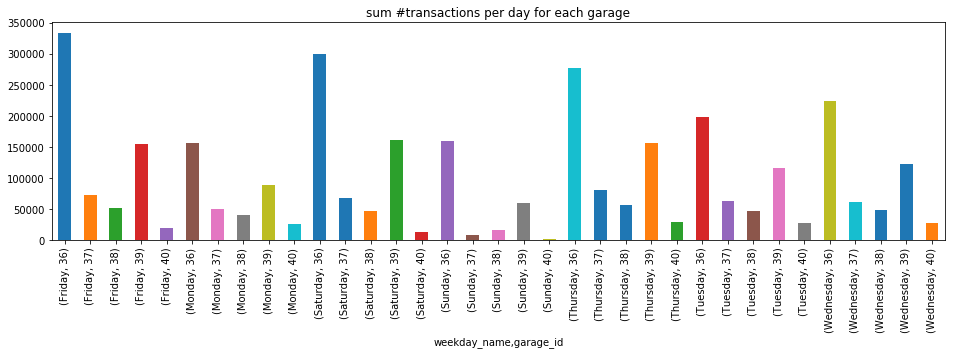

In [35]:
visitors_per_weekday.plot(title="sum #transactions per day for each garage", kind="bar",figsize=(16,4))

In [61]:
parking_transactions['weekday'] = parking_transactions['visit_datetime'].dt.weekday
visitors_per_weekday = parking_transactions.groupby(['weekday','garage_id','weekday_name'],as_index=False)['transaction_id'].count().rename(columns={'transaction_id':'count_transactions'})
visitors_per_weekday.head()

,weekday,garage_id,weekday_name,count_transactions
0,0.0,36,Monday,155671
1,0.0,37,Monday,49873
2,0.0,38,Monday,39126
3,0.0,39,Monday,87547
4,0.0,40,Monday,24941


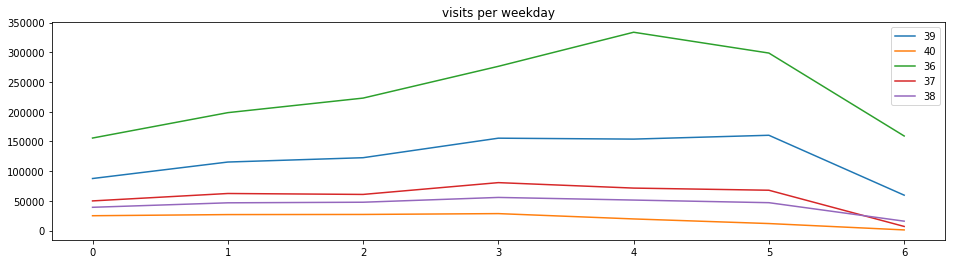

In [70]:
fig = plt.figure(figsize=(16, 4))  
ax = fig.add_subplot(111)
plt.title("visits per weekday")
for garage_id in parking_locations.garage_id.unique():
    mask =(visitors_per_weekday['garage_id']==garage_id)
    data= visitors_per_weekday.loc[mask]
    plt.plot(data['weekday'],data['count_transactions'],label=str(garage_id))
    ax.legend()
plt.show() 

<h2>and now... per hour instead of per day</h2>

In [71]:
parking_transactions['hour'] = parking_transactions['visit_datetime'].dt.hour
visitors_per_hour = parking_transactions.groupby(['hour','garage_id'])['transaction_id'].count().rename(columns={'transaction_id':'count_transactions'})
visitors_per_hour.head()

hour  garage_id
0.0   36           8063
      37             31
      38            166
      39             74
      40             20
dtype: int64

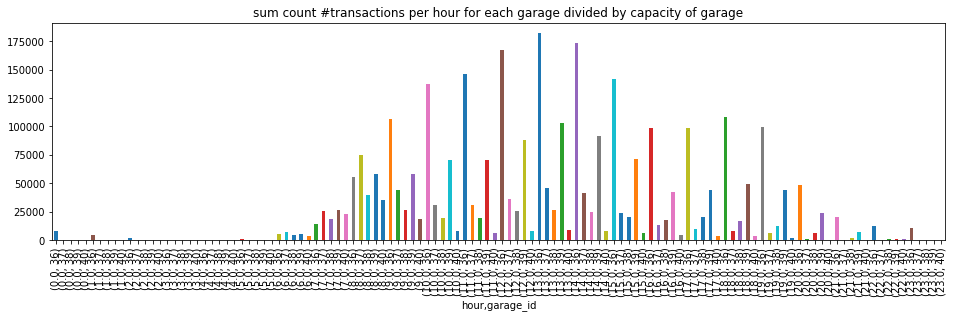

In [72]:
visitors_per_hour.plot(title="sum count #transactions per hour for each garage divided by capacity of garage",kind="bar",figsize=(16,4))

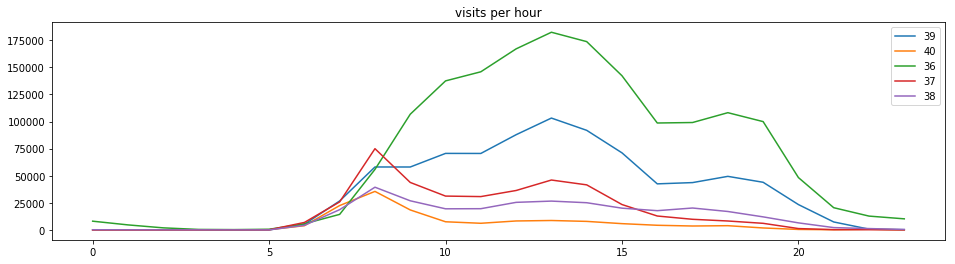

In [74]:
visitors_per_hour = parking_transactions.groupby(['garage_id','hour'],as_index=False)['transaction_id'].count().rename(columns={'transaction_id':'count_transactions'})
fig = plt.figure(figsize=(16, 4))  
ax = fig.add_subplot(111)
plt.title("visits per hour")
for garage_id in parking_locations.garage_id.unique():
    mask =(visitors_per_hour['garage_id']==garage_id)
    data= visitors_per_hour.loc[mask]
    plt.plot(data['hour'],data['count_transactions'],label=str(garage_id))
    ax.legend()
plt.show() 

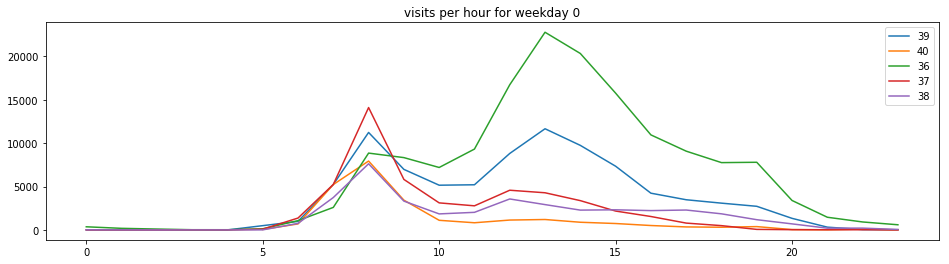

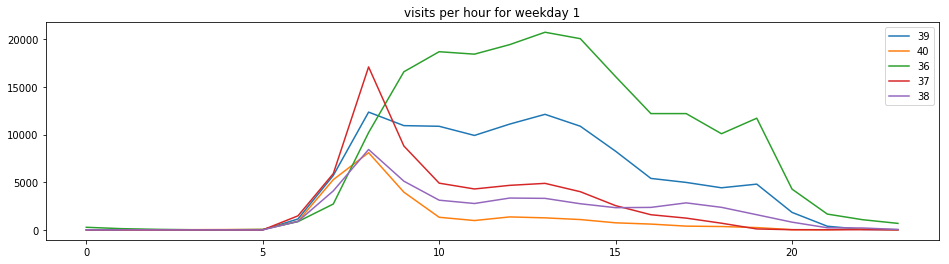

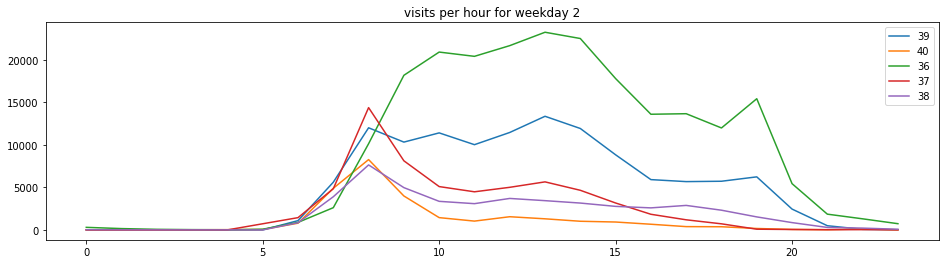

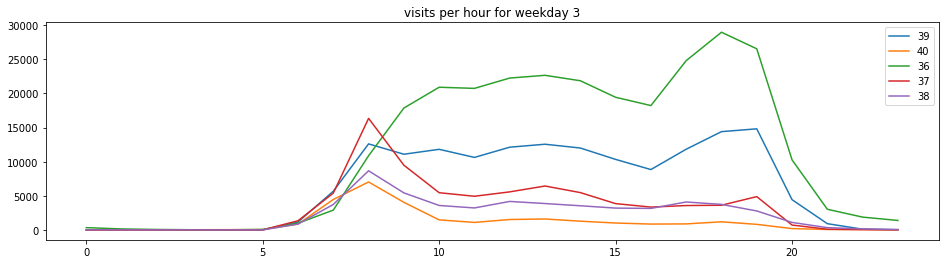

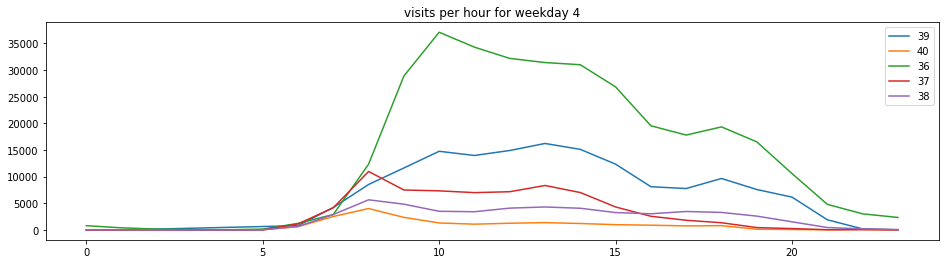

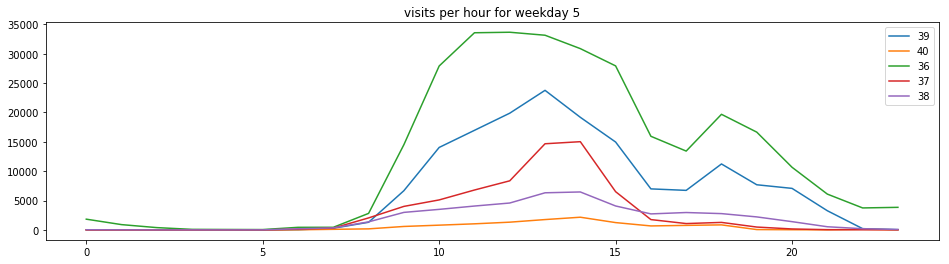

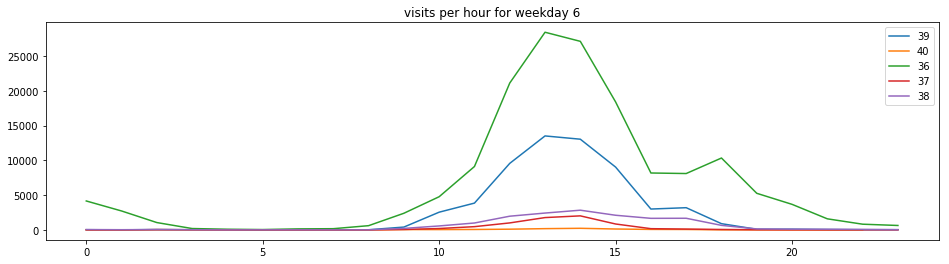

In [79]:
visitors_per_hour = parking_transactions.groupby(['garage_id','hour','weekday'],as_index=False)['transaction_id'].count().rename(columns={'transaction_id':'count_transactions'})
for weekday in range(0,6+1):
    fig = plt.figure(figsize=(16, 4))  
    ax = fig.add_subplot(111)
    plt.title("visits per hour for weekday "+str(weekday))
    for garage_id in parking_locations.garage_id.unique():
        mask =(visitors_per_hour['garage_id']==garage_id) & (visitors_per_hour['weekday']==weekday)
        data= visitors_per_hour.loc[mask]
        plt.plot(data['hour'],data['count_transactions'],label=str(garage_id))
        ax.legend()
plt.show() 

<h2>6. Perform clustering on locations </h2>
As a simple test with clustering, we will inspect the latitude and longitude of the parking locations and perform K-Means clustering on this. 

### a. Plot the latitude versus the longitude of the parking locations. 

### b. Perform K-Means clustering on this
Perform the following steps:
<p>
    <ol>
<li>Perform K-means clustering on the dataset using the *KMeans* function from sklearn.cluster. We would like to create two groups (just for demonstrating now) so the number of clusters *k* in the algorithm is two. </li>
<li>Perform a prediction using *predict()* on the data set. </li>
<li>Show the results by coloring each dot in the scatterplot  </li>

    </ol>
</p>


### c. Add the column with the cluster number to the dataset and save it to csv
Call the result 'clusters.csv', for example. 

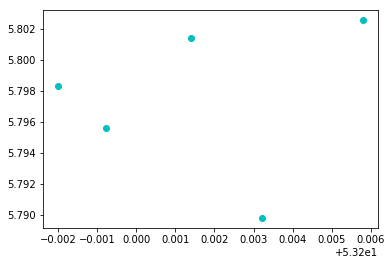

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(parking_locations.latitude, parking_locations.longitude,'co')

In [20]:
parking_locations

,garage_id,garage_nm,capacity_value,latitude,longitude
0,39,Oldehove,525,53.203227,5.789788
1,40,Oosterstraat,250,53.201402,5.801438
2,36,Zaailand,720,53.199224,5.795601
3,37,Klanderij,625,53.197996,5.798296
4,38,Hoeksterend,390,53.205792,5.802553


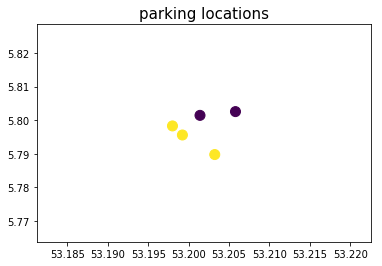

In [21]:
parking_locations[['latitude', 'longitude']] = parking_locations[['latitude', 'longitude']].astype(float)

from sklearn.cluster import KMeans
X =parking_locations[['latitude','longitude']] 
k_means=KMeans(n_clusters=2,random_state=0)
k_means.fit(X)

cluster_values=k_means.predict(X)
fig = plt.figure(figsize=(6, 4)) 
plt.title("parking locations",size=15)
plt.scatter(X.latitude,X.longitude,c=cluster_values,s=100)

In [22]:
parking_locations['cluster']=cluster_values
parking_locations['labels'] = k_means.labels_
parking_locations.head()

,garage_id,garage_nm,capacity_value,latitude,longitude,cluster,labels
0,39,Oldehove,525,53.203227,5.789788,1,1
1,40,Oosterstraat,250,53.201402,5.801438,0,0
2,36,Zaailand,720,53.199224,5.795601,1,1
3,37,Klanderij,625,53.197996,5.798296,1,1
4,38,Hoeksterend,390,53.205792,5.802553,0,0


In [25]:
#parking_locations.to_csv("../data/out-clusters.csv",sep=";")

#### Extra information about the groups

In [26]:
label_groups = parking_locations.groupby('labels')
for name, group in label_groups:
    print(name) 
    print(group.describe())

0
       garage_id  capacity_value   latitude  longitude  cluster  labels
count   2.000000        2.000000   2.000000   2.000000      2.0     2.0
mean   39.000000      320.000000  53.203597   5.801996      0.0     0.0
std     1.414214       98.994949   0.003104   0.000789      0.0     0.0
min    38.000000      250.000000  53.201402   5.801438      0.0     0.0
25%    38.500000      285.000000  53.202499   5.801717      0.0     0.0
50%    39.000000      320.000000  53.203597   5.801996      0.0     0.0
75%    39.500000      355.000000  53.204694   5.802275      0.0     0.0
max    40.000000      390.000000  53.205792   5.802553      0.0     0.0
1
       garage_id  capacity_value   latitude  longitude  cluster  labels
count   3.000000        3.000000   3.000000   3.000000      3.0     3.0
mean   37.333333      623.333333  53.200149   5.794562      1.0     1.0
std     1.527525       97.510683   0.002736   0.004348      0.0     0.0
min    36.000000      525.000000  53.197996   5.789788      

## Done!
This is the end of tutorial 1. In the next tutorial, we will do the data preparation. 